In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X= df.iloc[:,[3,4]].values

In [7]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

[1673624.5]
[1673624.5, 440146.70193894394]
[1673624.5, 440146.70193894394, 350813.66784874944]
[1673624.5, 440146.70193894394, 350813.66784874944, 257469.24955819763]
[1673624.5, 440146.70193894394, 350813.66784874944, 257469.24955819763, 226845.86790239363]
[1673624.5, 440146.70193894394, 350813.66784874944, 257469.24955819763, 226845.86790239363, 160901.92915504624]
[1673624.5, 440146.70193894394, 350813.66784874944, 257469.24955819763, 226845.86790239363, 160901.92915504624, 128434.201055407]
[1673624.5, 440146.70193894394, 350813.66784874944, 257469.24955819763, 226845.86790239363, 160901.92915504624, 128434.201055407, 99238.2480704213]
[1673624.5, 440146.70193894394, 350813.66784874944, 257469.24955819763, 226845.86790239363, 160901.92915504624, 128434.201055407, 99238.2480704213, 78123.16798641863]
[1673624.5, 440146.70193894394, 350813.66784874944, 257469.24955819763, 226845.86790239363, 160901.92915504624, 128434.201055407, 99238.2480704213, 78123.16798641863, 69006.6803202835

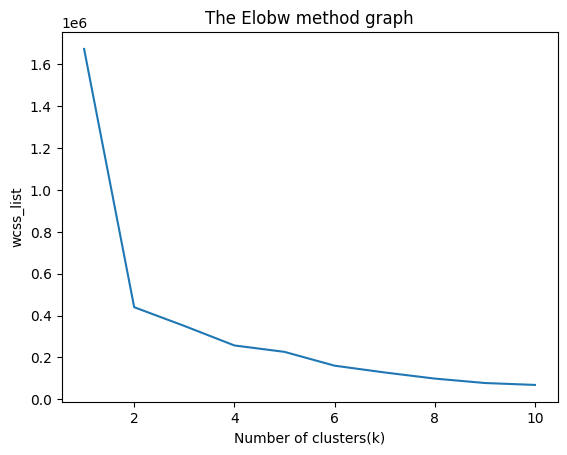

In [8]:
from sklearn.cluster import KMeans
wcss_list=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
    print(wcss_list)
plt.plot(range(1,11),wcss_list)
plt.title("The Elobw method graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()
    

In [9]:
x=X

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

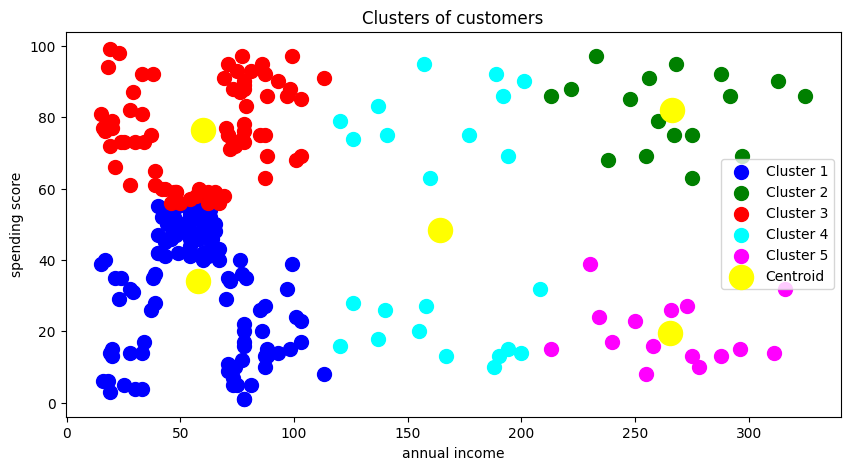

In [11]:
plt.figure(figsize=(10,5))

plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster

plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster

plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster

plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster

plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Centroid")
plt.title("Clusters of customers")
plt.title("Clusters of customers")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X,y_predict)
print(f"Silhouetter score:{silhouette_avg:.2f}")

Silhouetter score:0.34


In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)